## 라이브러리 설정
Dependancy 불러오기 (import)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io.arff import loadarff

## 데이터 불러오기
1. 데이터를 직접 다운로드하여 불러오기

In [3]:
file_path = 'dataset/'  # 사용자 Local 환경 내의 다운로드 받은 데이터 파일이 위치한 경로 (현재 파일 위치 기준)
train_fn="FordA_TRAIN.arff"  # Train 데이터 파일명
test_fn="FordA_TEST.arff"  # Test 데이터 파일명

# ariff 확장자를 load 하기 위한 함수
def read_ariff(path):
    raw_data, meta=loadarff(path)
    cols=[x for x in meta]
    data2d = np.zeros([raw_data.shape[0],len(cols)])
    for i,col in zip(range(len(cols)),cols):
        data2d[:,i]=raw_data[col]
    return data2d

train = read_ariff(file_path + train_fn)
test = read_ariff(file_path + test_fn)

print(train.shape)
print(test.shape)

(3601, 501)
(1320, 501)


In [4]:
data=np.vstack((train,test)) # 전체적인 data를 보기 위해 train과 test를 합친다
data.shape

(4921, 501)

In [5]:
X=data[:,:-1]
y=data[:,-1] # 마지막 column 에 label 값이 있음
X.shape 
y.shape
print(len(y))

4921


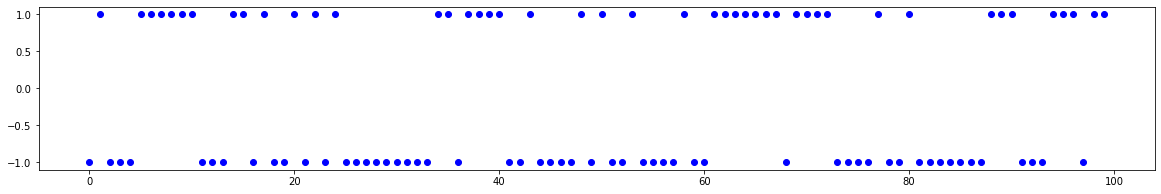

In [6]:
# outlier가 isolated outlier 인지 assembled outlier 인지 알아내기 위한 시각화
# data가 4921개이므로 먼저 100개만 나타냄
# 주어진 data 는 시간에 따라서 볼 때 assembled outlier 이다
plt.figure(figsize=(20,3)) #figsize는 inch 단위

plt.plot(y[0:100],'bo')
plt.show()

## 데이터 시각화
시각화 방법
1. 데이터의 불균형 확인 ( 전체 data에서 불균형을 먼저 확인 )
2. 특정 시간에서의 시계열 샘플을 plot ( 정상/ 비정상 나타낼 수 있음)
3. 1개의 임의의 센서 값의 시계열 plot -> 500개까지 찍어 볼 수는 있음

### 시각화 I: 데이터 불균형(Data Imbalance) 확인

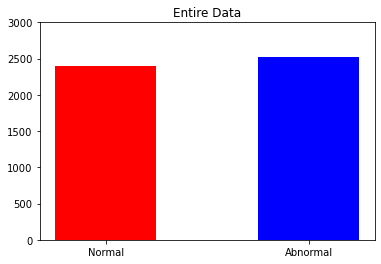

정상 데이터의 개수:  2394
비정상 데이터의 개수:  2527


In [7]:
count_normal=0
count_abnormal=0

for value in y:
    if value==1:
        count_normal+=1
    else:
        count_abnormal+=1

x=[0,1]
labels = ["Normal", "Abnormal"]
counts_data=[count_normal,count_abnormal]

plt.title("Entire Data")
plt.bar(x, counts_data, width=0.5, color=["red", "blue"])  # Test 데이터의 정상/비정상 개수 BarPlot
plt.ylim([0, 3000])
plt.xticks(x, labels)  
plt.show()

print("정상 데이터의 개수: ",count_normal)
print("비정상 데이터의 개수: ",count_abnormal)

### 시각화 II-1: 특정 시간에서의 시계열 샘플을 플롯

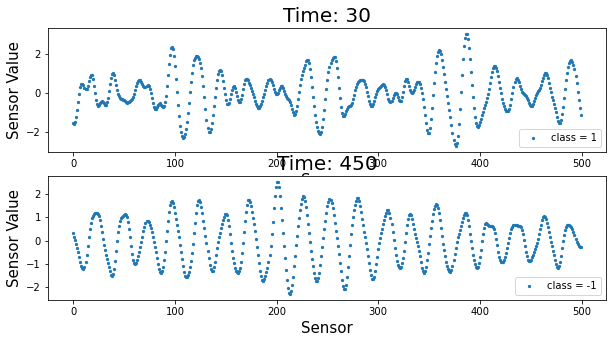

In [8]:
plt.figure(figsize = (10, 5))
# 정상일 때의 plot
normal_x=X[y==1]
time_normal= 30    #0~2393 사이의 정수 입력 : 2394개
plt.subplot(2,1,1)
plt.scatter(range(0,500) , normal_x[time_normal] , label="class = 1", marker='o', s=5)

plt.title("Time: {}".format(time_normal),fontsize=20)
plt.legend(loc="lower right")
plt.xlabel("Sensor", fontsize=15)
plt.ylabel("Sensor Value", fontsize=15)

 # 비정상일 때의 plot
abnormal_x=X[y==-1]
time_abnormal= 450 #0~2526 사이의 정수 입력 : 2527개
plt.subplot(2,1,2)
plt.scatter(range(0,500) , abnormal_x[time_abnormal] , label="class = -1", marker='o', s=5)

plt.title("Time: {}".format(time_abnormal),fontsize=20)
plt.legend(loc="lower right")
plt.xlabel("Sensor", fontsize=15)
plt.ylabel("Sensor Value", fontsize=15)

plt.show()

# 가까이 있는 seosor 일수록 서로 비슷한 값을 가지는 것을 알 수 있음

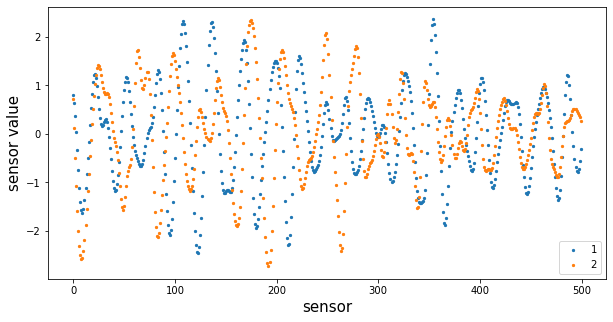

In [16]:
# 시간별로 값의 변화
plt.figure(figsize = (10, 5))

time1=1
time2=2
time3=102
plt.scatter(range(0,500), X[time1],marker='o',s=5 ,label="1")
plt.scatter(range(0,500), X[time2],marker='o',s=5 ,label="2")
#plt.scatter(range(0,500), X[time3],marker='o',s=5)
plt.legend(loc="lower right")
plt.xlabel("sensor",fontsize=15)
plt.ylabel("sensor value",fontsize=15)
plt.show()

### 시각화 III: 1개의 임의의 센서 값의 시계열 Plot

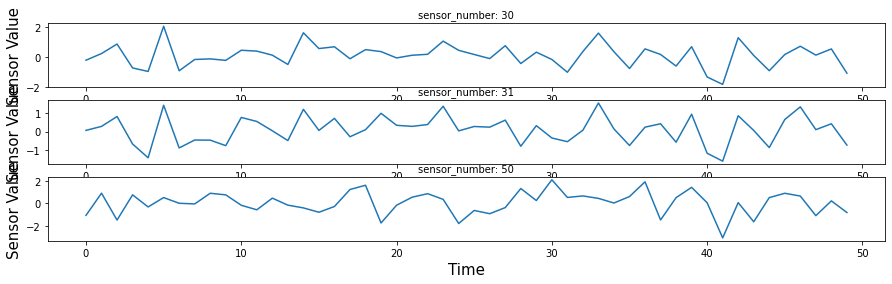

In [10]:
sensor_number = 30  # 0~499 사이의 정수 입력 : 센서 개수 500개

plt.figure(figsize = (15, 4))


plt.subplot(3,1,1)
plt.title("sensor_number: {}".format(sensor_number), fontsize=10)
plt.plot(X[0:50,sensor_number])
plt.xlabel("Time", fontsize=15)
plt.ylabel("Sensor Value", fontsize=15)


sensor_number2 = 31

plt.subplot(3,1,2)
plt.title("sensor_number: {}".format(sensor_number2), fontsize=10)
plt.plot(X[0:50,sensor_number2])
plt.xlabel("Time", fontsize=15)
plt.ylabel("Sensor Value", fontsize=15)

sensor_number3 = 50

plt.subplot(3,1,3)
plt.title("sensor_number: {}".format(sensor_number3), fontsize=10)
plt.plot(X[0:50,sensor_number3])
plt.xlabel("Time", fontsize=15)
plt.ylabel("Sensor Value", fontsize=15)

plt.show()

In [11]:
# 상관계수 test
# 1. 상관계수 self 정의
# 2. scipy.stats 에서 pearsonr import 해서 사용 pearsonr(a,b)
# 3. numpy 에서 사용 : np.corrcoef(a,b)

a=[1,2,3,4,5]
b=[2,3,0,5,6]

def correlation(X,Y):
    return np.dot((X-np.mean(X)),(Y-np.mean(Y))) / ((np.linalg.norm(X-np.mean(X)))*(np.linalg.norm(Y-np.mean(Y))))
print(correlation(a,b))
#from scipy.stats import pearsonr
#a=[1,2,3,4,5]
#b=[1,2,3,4,5]
#print(pearsonr(a,b))
#print(np.corrcoef(a,b))


0.6622661785325219


In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler()
scaled_X=scaler.fit_transform(X)
scaled_X[0,:]

array([0.39670971, 0.39838246, 0.44503612, 0.51291763, 0.58294096,
       0.65143782, 0.67195286, 0.73745767, 0.75906688, 0.74426053,
       0.71567608, 0.69357184, 0.6540187 , 0.62446086, 0.59867159,
       0.54611312, 0.4760049 , 0.38217818, 0.26269822, 0.17558136,
       0.19316979, 0.22299167, 0.25018289, 0.33485208, 0.42518178,
       0.44582591, 0.4458606 , 0.46979558, 0.53336195, 0.53411717,
       0.51218384, 0.5129372 , 0.57932088, 0.62031755, 0.67242464,
       0.75256931, 0.76617574, 0.77708891, 0.72030377, 0.67245296,
       0.6244039 , 0.58446093, 0.51827348, 0.42771111, 0.38961005,
       0.34163418, 0.3160391 , 0.31821025, 0.29501862, 0.2769565 ,
       0.33365958, 0.37456411, 0.44574194, 0.49669066, 0.52636878,
       0.55954947, 0.58979412, 0.60080563, 0.61729462, 0.60403857,
       0.59292517, 0.54393992, 0.50753714, 0.48757472, 0.43493988,
       0.41844431, 0.42446185, 0.41640969, 0.44428236, 0.4456733 ,
       0.42477841, 0.42123866, 0.44938284, 0.51310744, 0.51793

In [13]:
# sensor별로(feature별로) MinMax 정규화 시키기
# interpolation 과정 없이 coefficient 구하기

tempCoefficient=[]
for i in range(len(X)-1):
    tempCoefficient.append(correlation(scaled_X[i],scaled_X[i+1]))
tempCoefficient

[-0.11895348321092342,
 -0.06596545417313386,
 0.13457769830443697,
 -0.0796217187483211,
 -0.00044768743637340724,
 0.1684230638177193,
 0.21931501463255648,
 0.14910425558078633,
 0.0500347220593804,
 0.22402210534532654,
 0.2591036442069654,
 -0.3594573408780025,
 -0.0035803217243178705,
 -0.11856504927183027,
 -0.03685107026445291,
 0.3648320015125225,
 -0.08937359576510776,
 0.30659406165488845,
 -0.3437256899065177,
 0.005206275804538137,
 0.11992843431402611,
 -0.08154830989403984,
 0.0054073217206583295,
 0.013057569159333919,
 0.04958540717531022,
 0.1719179041874826,
 -0.24029376710726805,
 -0.24186384754582932,
 0.3638518829144232,
 -0.1321243348448503,
 0.030011251943494435,
 -0.16232725021369562,
 -0.02026066901144507,
 -0.07009047555029267,
 -0.059912821703122406,
 -0.1379926545535274,
 0.0498010507404679,
 -0.14569148210596625,
 0.049445013562254454,
 -0.36896748938077395,
 0.11042244208693071,
 0.011718020510166467,
 0.008381044521601677,
 0.07285196958265928,
 -0.02008

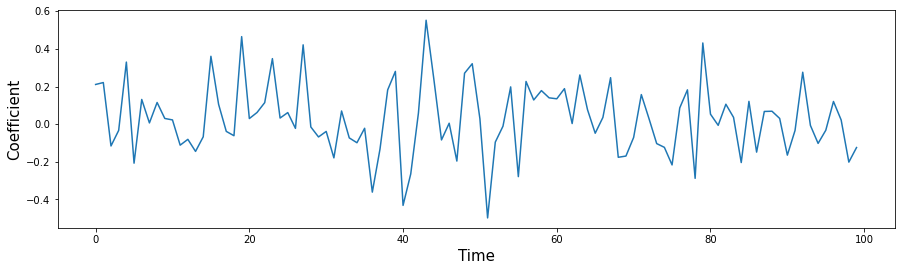

In [15]:
plt.figure(figsize = (15, 4))
plt.plot(tempCoefficient[100:200])
plt.xlabel("Time",fontsize=15)
plt.ylabel("Coefficient",fontsize=15)
plt.show()